## Spotify 2023 Data Analysis. 

### Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from IPython.display import display
import plotly.express as px
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

print('packages imported')

packages imported


In [2]:
df = pd.read_csv(r'C:\Users\cindy\Documents\Projects\spotify_2023.csv', encoding='latin-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
df.shape

(953, 24)

#### Preliminary Analysis

In [4]:
# Getting the summary statistics (mean, min, max, etc).
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [5]:
# check for null values, if there are null values, replace with 0
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [6]:
# Replace the null values by 0
df['in_shazam_charts'].fillna(0, inplace=True)
df['key'].fillna(0, inplace=True)

df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      953 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   953 non-null    ob

#### Top 10 Most Streamed Tracks

In [8]:
# df['streams'] column is a object and needs to be changed to numerical. Find the non-numeric row and drop it.
df['streams'] = pd.to_numeric(df['streams'], errors = 'coerce', downcast='integer')
non_num  = df[df['streams'].isna()]
# drop row and reset index
df.drop(574, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

df.shape

(952, 24)

In [9]:
print(df['streams'].dtype)

float64


In [10]:
# What are the top 10 most streamed songs of 2022?
#Order 'streams' in desc order 
top_10_songs = df.sort_values(by='streams', ascending=False).head(10)
top_10_songs.reset_index(drop=True, inplace=True)

top_10_songs.head(1)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7


c:\Users\cindy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cindy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cindy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


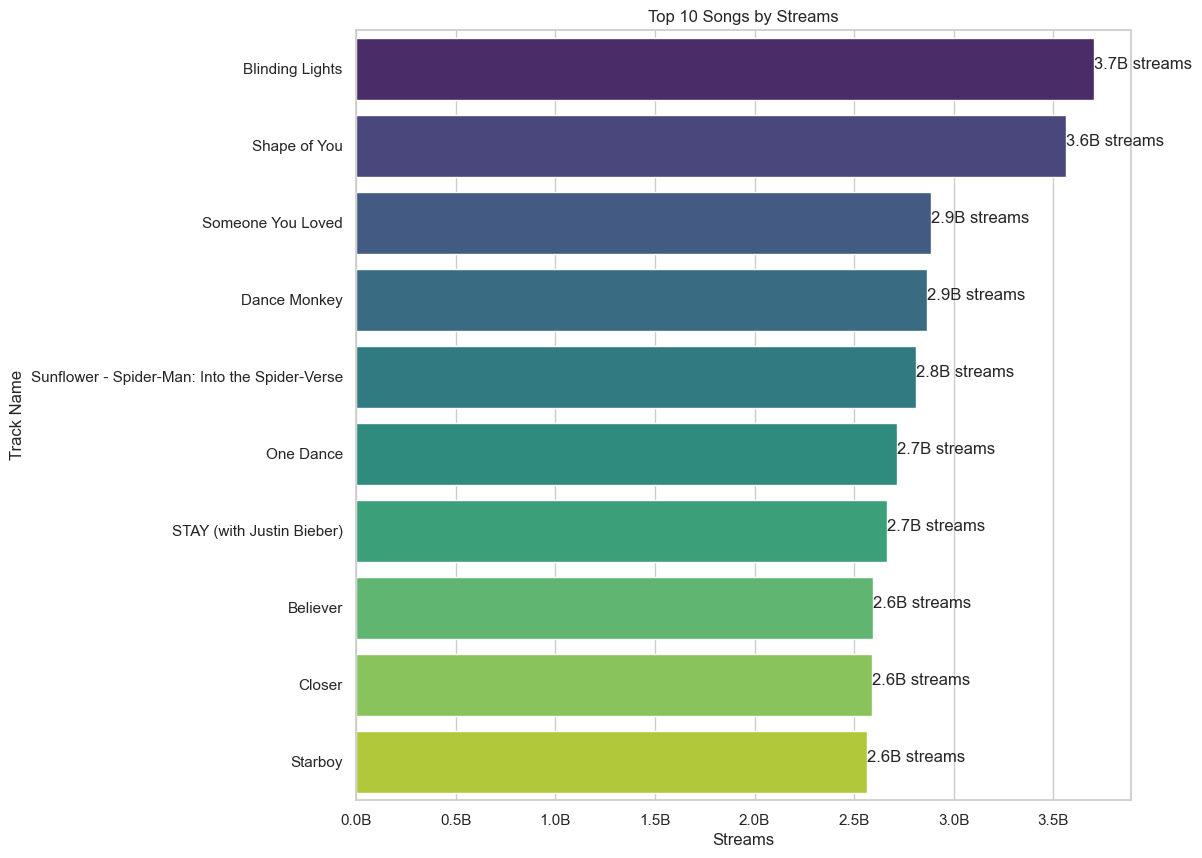

In [11]:
#create a bar chart to visualize top 10 songs
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
ax = sns.barplot(x='streams', y='track_name', data=top_10_songs, palette="viridis")

# Add labels and title
ax.set(xlabel="Streams", ylabel="Track Name")
plt.title("Top 10 Songs by Streams")

# Define a custom tick formatter function
def billions_formatter(x, pos):
    return f'{x / 1e9:.1f}B'

# Apply the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Annotate the bars with stream counts
for index, row in top_10_songs.iterrows():
    plt.text(row['streams'], index, f"{row['streams'] / 1e9:.1f}B streams")


# Show the plot
plt.show()

#### Top 10 Most Streamed Artist

In [12]:
df['artist(s)_name'] = df['artist(s)_name'].str.split(',')
df['artist(s)_name']

0         [Latto,  Jung Kook]
1               [Myke Towers]
2            [Olivia Rodrigo]
3              [Taylor Swift]
4                 [Bad Bunny]
                ...          
947            [Selena Gomez]
948            [Taylor Swift]
949     [Feid,  Paulo Londra]
950    [Feid,  Sech,  Jhayco]
951               [Burna Boy]
Name: artist(s)_name, Length: 952, dtype: object

In [13]:
#seperate songs with multiple artist into their own rows
df = df.explode('artist(s)_name', ignore_index=True)
df.reset_index(drop=True, inplace=True)

#drop artist count row
df.drop('artist_count', axis=1, inplace=True)
df.head(3)

,track_name,artist(s)_name,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,2023,7,14,553,147,141381703.0,43,263,...,125,B,Major,80,89,83,31,0,8,4
1,Seven (feat. Latto) (Explicit Ver.),Jung Kook,2023,7,14,553,147,141381703.0,43,263,...,125,B,Major,80,89,83,31,0,8,4
2,LALA,Myke Towers,2023,3,23,1474,48,133716286.0,48,126,...,92,C#,Major,71,61,74,7,0,10,4


In [14]:
duplicated_rows = df[df.duplicated(keep=False)]
display(duplicated_rows)

,track_name,artist(s)_name,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
778,Fingers Crossed,Lauren Spencer Smith,2022,1,5,2235,0,349585590.0,65,7,...,109,F,Major,60,45,47,62,0,31,5
779,Fingers Crossed,Lauren Spencer Smith,2022,1,5,2235,0,349585590.0,65,7,...,109,F,Major,60,45,47,62,0,31,5


In [15]:
#delete duplicate rows
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

# Check if the duplicates are gone
dup_rows = df[df.duplicated(keep=False)]
display(dup_rows)
df.shape

,track_name,artist(s)_name,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%


(1480, 23)

In [16]:
#calculate sum of streams, grouping by artist
artst_strms=df.groupby('artist(s)_name')['streams'].sum().reset_index()
most_strm_artst = artst_strms.sort_values(by='streams', ascending=False).head(10)

most_strm_artst.head(10)

,artist(s)_name,streams
750,The Weeknd,2.151655e+10
379,Bad Bunny,1.536378e+10
453,Ed Sheeran,1.455968e+10
739,Taylor Swift,1.442324e+10
488,Harry Styles,1.160865e+10
459,Eminem,1.019373e+10
38,Bad Bunny,8.449743e+09
526,Justin Bieber,8.138019e+09
448,Drake,8.043031e+09
494,Imagine Dragons,7.719447e+09


In [17]:
# Create a treemap using Plotly Express
fig = px.treemap(most_strm_artst, 
                 path=['artist(s)_name'],  # Define the hierarchy with only one level (the artist's name)
                 values='streams',  # Define the values to visualize (total streams)
                 color='streams',  # Color the treemap by total stream count
                 hover_data=['streams'],  # Add additional hover information (total streams)
                 title='Top 10 Most Streamed Artists (Treemap)')

# Customize the appearance
fig.update_traces(textinfo='label+value', selector=dict(type='treemap'))

# Show the interactive treemap
fig.show()

#### Top 10 artist with the most tracks

In [18]:
artst_trck_cnt = df['artist(s)_name'].value_counts()

top_10_artst = artst_trck_cnt.head(10)

display(top_10_artst)

artist(s)_name
Taylor Swift      36
The Weeknd        34
Bad Bunny         26
SZA               23
Kendrick Lamar    23
Drake             19
Harry Styles      17
Feid              15
 Bad Bunny        14
 Metro Boomin     13
Name: count, dtype: int64

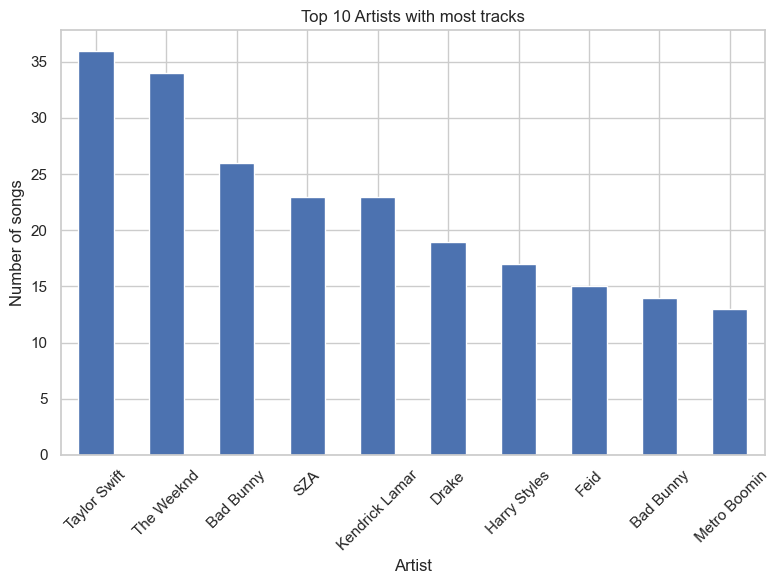

In [19]:
# create bar chart with top 10 artist
plt.figure(figsize=(8, 6))
top_10_artst.plot(kind='bar')
plt.xlabel('Artist')
plt.ylabel('Number of songs')
plt.title('Top 10 Artists with most tracks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Exploring Correlations and Music Attributes

#### Correlation between attributes and streams

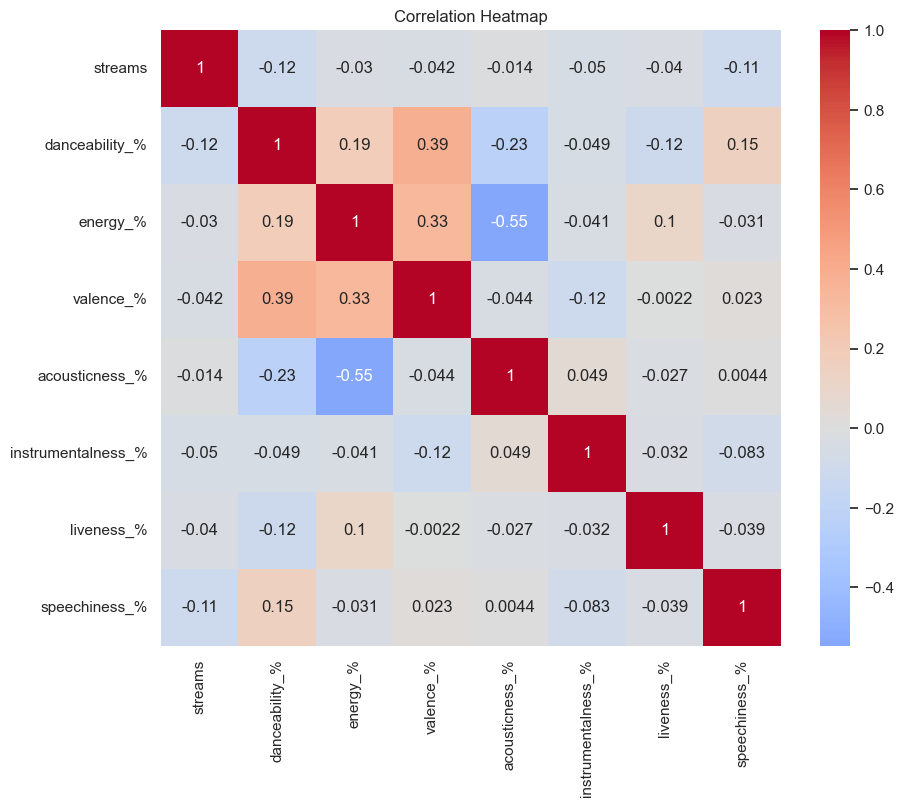

In [20]:
# Correlation between attributes and streams
correlation_matrix = df[['streams', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

c:\Users\cindy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\cindy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



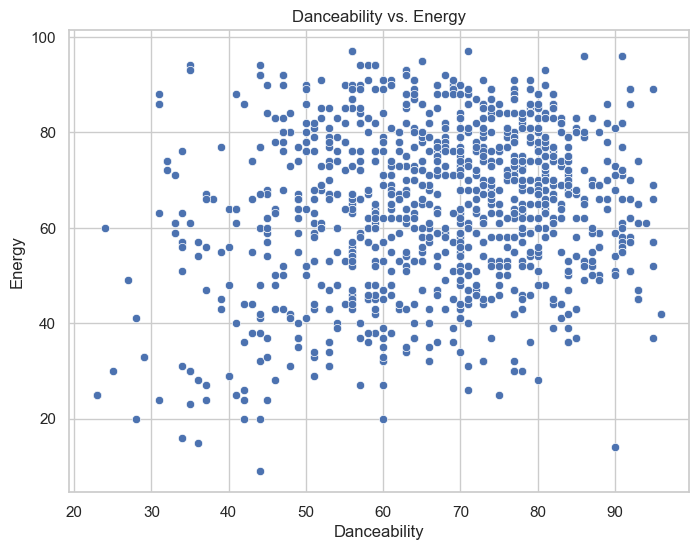

In [21]:
# Scatter plot of danceability vs. energy
plt.figure(figsize=(8, 6))
sns.scatterplot(x='danceability_%', y='energy_%', data=df)
plt.title('Danceability vs. Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

#### Visualization of Music Sounds

c:\Users\cindy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\cindy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



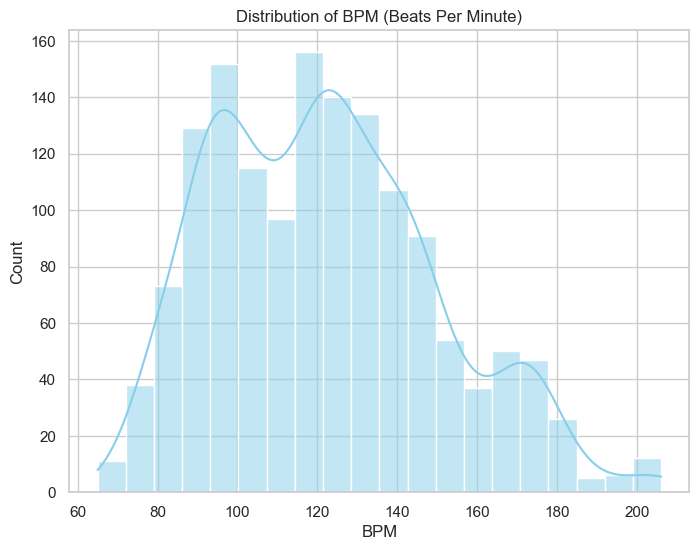

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(df['bpm'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of BPM (Beats Per Minute)')
plt.xlabel('BPM')
plt.ylabel('Count')
plt.show()

c:\Users\cindy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\cindy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\cindy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\cindy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\cindy\AppData\Local\Programs\Py

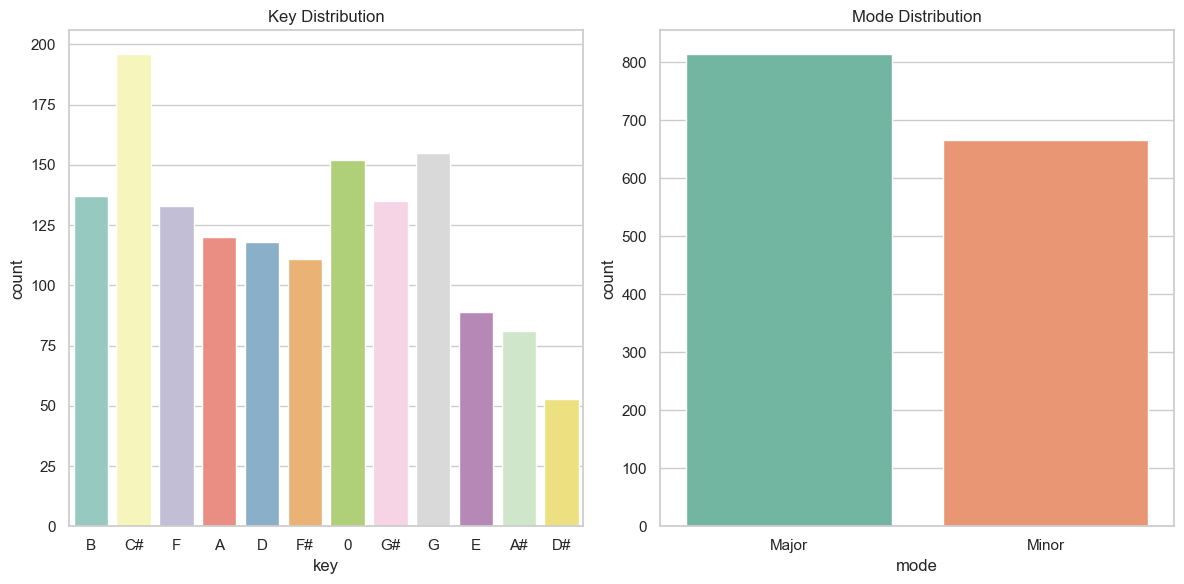

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='key', data=df, palette='Set3')
plt.title('Key Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='mode', data=df, palette='Set2')
plt.title('Mode Distribution')

plt.tight_layout()
plt.show()

#### Linear Regression

In [24]:
int_cols = df.select_dtypes(include=['int', 'float'])
print(int_cols.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   released_year         1480 non-null   int64  
 1   released_month        1480 non-null   int64  
 2   released_day          1480 non-null   int64  
 3   in_spotify_playlists  1480 non-null   int64  
 4   in_spotify_charts     1480 non-null   int64  
 5   streams               1480 non-null   float64
 6   in_apple_playlists    1480 non-null   int64  
 7   in_apple_charts       1480 non-null   int64  
 8   in_deezer_charts      1480 non-null   int64  
 9   bpm                   1480 non-null   int64  
 10  danceability_%        1480 non-null   int64  
 11  valence_%             1480 non-null   int64  
 12  energy_%              1480 non-null   int64  
 13  acousticness_%        1480 non-null   int64  
 14  instrumentalness_%    1480 non-null   int64  
 15  liveness_%           

In [25]:
X = int_cols.drop('streams', axis = 1)
y = df.streams

In [26]:
# define the model
model = LinearRegression()

# train the model
model.fit(X,y)

LinearRegression()

In [27]:
# get coeficients of the model
coeficientes = model.coef_
intercepto = model.intercept_

# Print coeficients
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)

Coeficientes: [ 2443099.18634783  3815909.11172843  3396539.67303014    33290.00882534
  3183553.96765675  2978166.07897952  -192385.89997462 -4692759.76534726
  -125399.31329983 -1655228.33284439  -640476.62345227 -1535021.74214489
   617061.43645101 -1056573.11629307   189497.48563348  -281435.08226545]
Intercepto: -4651885850.674766


In [28]:
columns_to_exclude = ['in_spotify_playlists','in_spotify_charts','in_apple_playlists','in_apple_charts','in_deezer_charts']

X_2 = X.drop(columns_to_exclude, axis = 1)
model.fit(X_2,y)
X3 = sm.add_constant(X_2)
est = sm.OLS(y, X3)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     10.29
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           2.41e-18
Time:                        18:32:32   Log-Likelihood:                -31798.
No. Observations:                1480   AIC:                         6.362e+04
Df Residuals:                    1468   BIC:                         6.368e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.116e+10   2.66

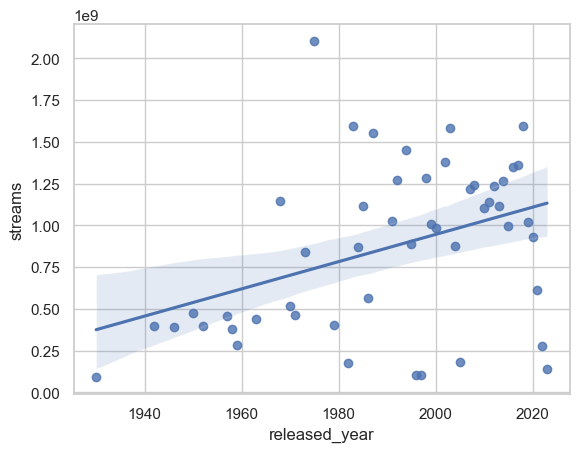

In [29]:
pd.set_option('display.float_format', '{:.2f}'.format)
result = df.groupby("released_year").streams.mean()

# graph year x streams.mean
sns.regplot(x=result.index, y=result)

# Show the plot
plt.show()

## There is a outlier around 1973-1978 (prob 1975)

In [30]:
df[df.released_year == 1975]
## 2 all time hits

,track_name,artist(s)_name,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
128,Riptide,Vance Joy,1975,1,1,31123,55,2009094673.00,300,65,...,102,C#,Major,48,50,73,43,0,15,4
1125,Bohemian Rhapsody - Remastered 2011,Queen,1975,10,31,40112,3,2197010679.00,321,162,...,71,0,Minor,41,23,40,27,0,30,5


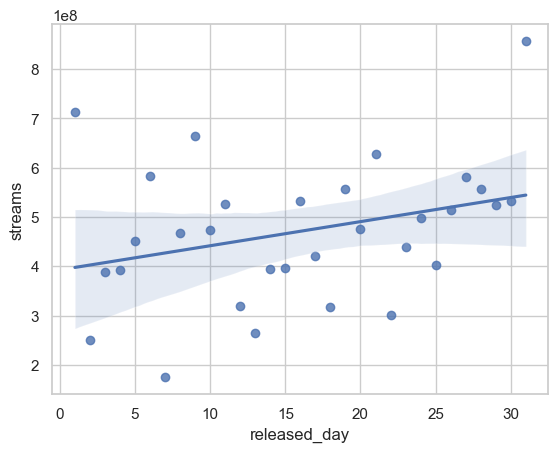

In [31]:
result2 = df.groupby("released_day").streams.mean()

sns.regplot(x=result2.index, y=result2)

# Show the plot
# plot shows that it is more convenient to release songs later in the month
plt.show()

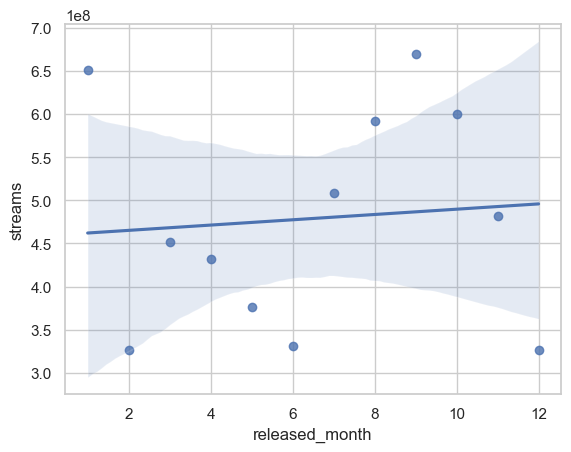

In [32]:
result3 = df.groupby('released_month').streams.mean()
sns.regplot(x=result3.index, y=result3)

# Show the plot
# no real relationship
plt.show()

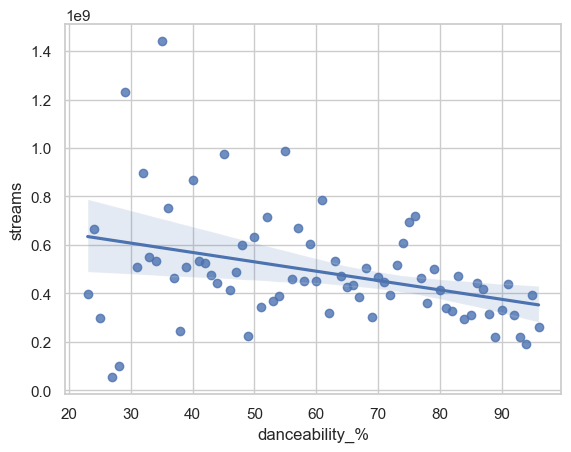

In [33]:
result4 = df.groupby('danceability_%').streams.mean()
sns.regplot(x=result4.index, y=result4)

# Show the plot
# the higher the danceability_%, the lower the streams
plt.show()

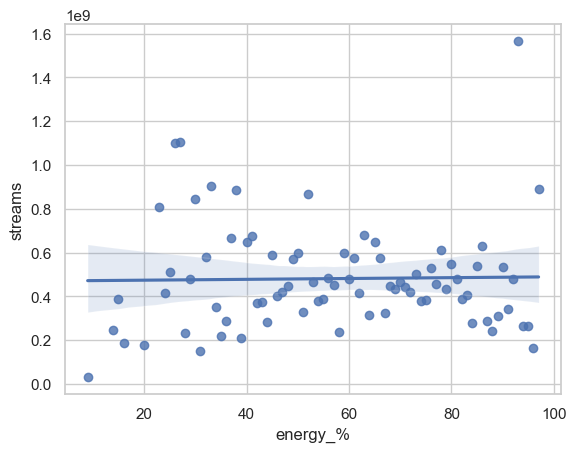

In [34]:
result5 = df.groupby('energy_%').streams.mean()
sns.regplot(x=result5.index, y=result5)

# Show the plot
# energy doesn't really have a effect on streams
plt.show()